# 足球探索性数据分析
## Football Exploratory Data Analysis (EDA)

In [3]:
pip install seaborn

     |████████████████████████████████| 215 kB 54 kB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 101 kB/s eta 0:00:01
     |████████████████████████████████| 12.4 MB 780 kB/s eta 0:00:01    |████████████████████████▌       | 9.5 MB 284 kB/s eta 0:00:11
     |████████████████████████████████| 60 kB 107 kB/s ta 0:00:011
     |████████████████████████████████| 67 kB 138 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
base_dir = "/Users/liujinliang/Downloads/footballdata/"
events_dir = base_dir+"events.csv"
ginf_dir = base_dir + "ginf.csv"
dic_dir = base_dir + "dictionary.txt"

## 1.加载数据

In [4]:
## 加载 events dataset
df_events = pd.read_csv(events_dir)
## 加载 ginf dataset, 该文件的数据后续会和events数据合并
df_ginf = pd.read_csv(ginf_dir)
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
df_ginf = df_ginf[['id_odsp', 'date', 'league', 'season', 'country']]

## 2.准备数据

In [5]:
## 合并events和ginf，在events df内增加'date', 'league', 'season', and 'country' 信息
df_events = df_events.merge(df_ginf, how='left')

In [6]:
## 只选取2015以后的数据，数据集中有截止2018年的比赛数据
df_events = df_events[df_events['season'] >= 2015]

In [7]:
## 把联赛名字换成中文，便于辨认
leagues = {'E0': '英超', 'SP1': '西甲',
          'I1': '意甲', 'F1': '英甲', 'D1': '德甲'}

In [8]:
## 完成名称的转换
df_events['league'] = df_events['league'].map(leagues)

## 3.读入并使用字典

In [9]:
## Events type 1
event_type_1 = pd.Series([
    'Announcement',
    'Attempt',
    'Corner',
    'Foul',
    'Yellow card',
    'Second yellow card',
    'Red card',
    'Substitution',
    'Free kick won',
    'Offside',
    'Hand ball',
    'Penalty conceded'], index=[[item for item in range(0, 12)]])

## Events type 2
event_type2 = pd.Series(['Key Pass', 'Failed through ball', 'Sending off', 'Own goal'],
                       index=[[item for item in range(12, 16)]])

## Match side
side = pd.Series(['Home', 'Away'], index=[[item for item in range(1, 3)]])

## Shot place
shot_place = pd.Series([
    'Bit too high', 
    'Blocked',
    'Bottom left corner',
    'Bottom right corner',
    'Centre of the goal',
    'High and wide',
    'Hits the bar',
    'Misses to the left',
    'Misses to the right',
    'Too high',
    'Top centre of the goal',
    'Top left corner',
    'Top right corner'
], index=[[item for item in range(1, 14)]])

## Outcome of shot
shot_outcome = pd.Series(['On target', 'Off target', 'Blocked', 'Hit the bar'],
                        index=[[item for item in range(1, 5)]])
## Location of shot
location = pd.Series([
    'Attacking half',
    'Defensive half',
    'Centre of the box',
    'Left wing',
    'Right wing',
    'Difficult angle and long range',
    'Difficult angle on the left',
    'Difficult angle on the right',
    'Left side of the box',
    'Left side of the six yard box',
    'Right side of the box',
    'Right side of the six yard box',
    'Very close range',
    'Penalty spot',
    'Outside the box',
    'Long range',
    'More than 35 yards',
    'More than 40 yards',
    'Not recorded'
], 
index=[[item for item in range(1, 20)]])

## 球员身体部位
bodypart = pd.Series(['right foot', 'left foot', 'head'], index=[[item for item in range(1, 4)]])

## Assist method
assist_method = pd.Series(['None', 'Pass', 'Cross', 'Headed pass', 'Through ball'],
                         index=[item for item in range(0, 5)])

## Situation
situation = pd.Series(['Open play', 'Set piece', 'Corner', 'Free kick'],
                     index=[item for item in range(1, 5)])

# 正式进入探索性数据分析阶段
## 4.使用柱状图进行简单可视化
我们在此notebook中会多次使用matplotlib创建柱状图。为了重用代码来执行类似的任务，封装成函数。

In [10]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")
    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

### 按事件进行统计
指标为事件的发生次数

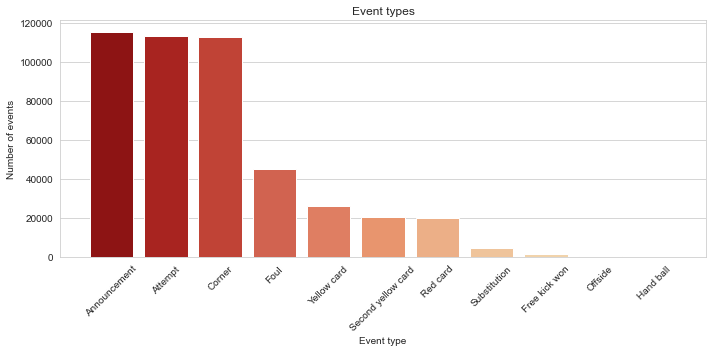

In [11]:
## 数出事件发生次数
events_series = df_events['event_type'].value_counts()

## 画图
plot_barplot(events_series, event_type_1.values,
            "Event type", "Number of events", "Event types", 'OrRd_r', 10, 5)

从上面的图形可以看出，在足球场上发生最多的三个事件是 announcement（响哨）attempt（尝试次数，包括突破、传球、射门）corner（角球）

### 射门地点
哪个位置射门形成进球的概率更高

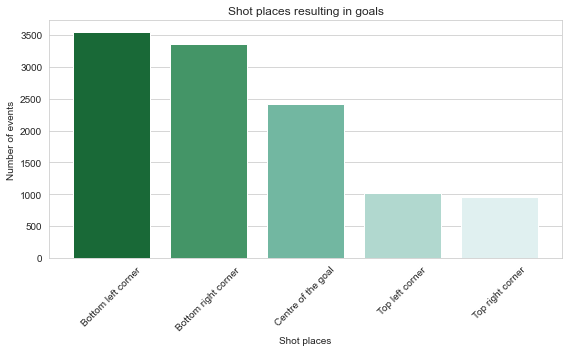

In [12]:

## 形成进球肯定鸣哨，否则无效。所以过滤鸣哨且形成进球的事件
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 1)]['shot_place'].value_counts()

#df_shot_places.describe()
#df_shot_places.head()
#print(shot_place[[2,3,4,11,12]])

## 画图
plot_barplot(df_shot_places, shot_place[[2, 3, 4, 11, 12]], 'Shot places', 'Number of events',
'Shot places resulting in goals', 'BuGn_r', 8, 5)

可以看到，容易得分的射门位置是底线附近。而正对球门的位置排在第三。
其实正对球门的位置应该是射门尝试最多的，让我们接着看。

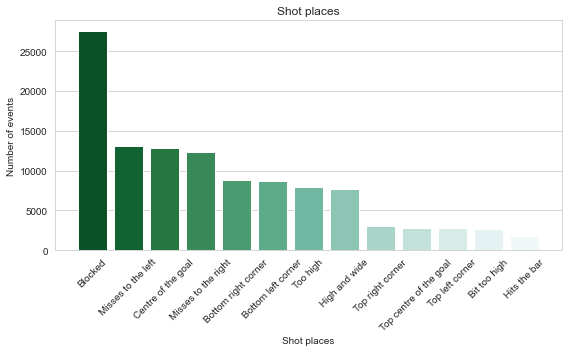

In [13]:
## 把原始数据复制一份
df_shot_places_ed = df_events.copy()

## 根据射门地点group
df_shot_places_ed = df_events.groupby('shot_place', as_index=False).count().sort_values('id_event',ascending=False).dropna()
df_shot_places_ed['shot_place'] = df_shot_places_ed['shot_place'].apply(np.int64)
#print(df_shot_places_ed['shot_place'])
#print(shot_place)
## 做一下mapping
df_shot_places_ed['shot_place'] = df_shot_places_ed['shot_place'].map(lambda x:list(shot_place)[x-1])
#print(df_shot_places_ed['shot_place'])
## 画图
plot_barplot(df_shot_places_ed['id_event'], df_shot_places_ed['shot_place'],
             'Shot places',
             'Number of events',
             'Shot places',
             'BuGn_r', 8, 5)

可以看到，在所有的射门尝试地点中，球门正前方这个区域排名第三。远高于底线区域，但是进球却排在底线区域后面，说明球门正前方也是对方防守的主要
区域

### 谁是攻击性最强的球队
在所有联赛中，进攻性最强的球队是哪些？

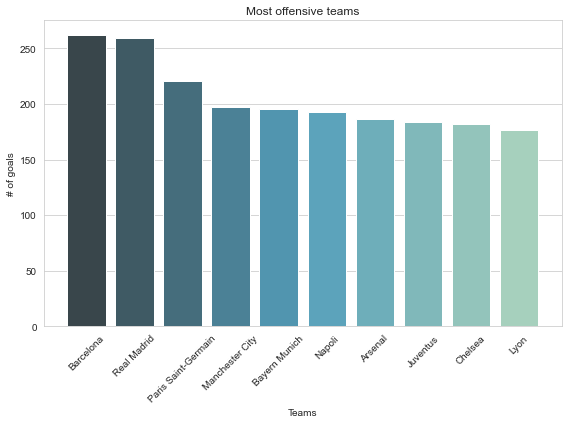

In [14]:

## 按照球队进行进球统计
grouping_by_offensive = df_events[df_events['is_goal']==1].groupby('event_team')

## top10
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=False)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## 画图
plot_barplot(scores, teams, 'Teams', '# of goals', 'Most offensive teams', 'GnBu_d', 8, 6)


有一个有趣的现象，在统计出的最具攻击性的球队中，英超和意甲各占了三只球队。但是大家都认为西班牙联赛才是最具进攻性的比赛。

#### 进球时间分布
按月统计欧洲联赛的进球

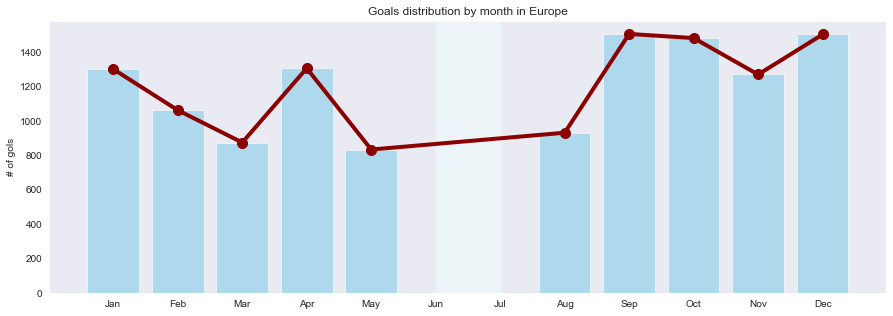

In [16]:
## 复制一份原始数据
df_events_distribution = df_events.copy()

## 只过滤进球相关数据
df_events_distribution = df_events_distribution[df_events_distribution['is_goal']==1]
## 处理日期
df_events_distribution['date'] = pd.to_datetime(df_events_distribution['date'])

## 把日期分解为 day month year 三个字段
df_events_distribution['day'] = df_events_distribution['date'].apply(lambda x: x.day)
df_events_distribution['month'] = df_events_distribution['date'].apply(lambda x: x.month)
df_events_distribution['year'] = df_events_distribution['date'].apply(lambda x: x.year)

## 按照月份排序
sorted_indexes = sorted(df_events_distribution['month'].unique())

## 月度标签
months =['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


## 画图
sns.set_style('dark')
plt.figure(figsize=(15, 5))
plt.bar(sorted_indexes, 
        df_events_distribution.groupby('month').count()['id_event'], alpha=0.6,
       color='skyblue')
plt.plot(sorted_indexes, 
        df_events_distribution.groupby('month').count()['id_event'], color='darkred', marker='o',
        linewidth=4, markersize=10)
plt.axvspan(6, 7, alpha=0.5, color='azure')
plt.xticks([item for item in range(1, 13)], months);
plt.ylabel('# of gols')
plt.title('Goals distribution by month in Europe');

#### 通过上图可以看出：
#### 1.欧洲联赛进球最多的月份是9月，10月和12月
#### 2.8月份进球少，因为间歇期刚结束，说明间歇期确实对球队和球员状态有明显影响
#### 3.其他月份的进球总数的明显起伏是因为什么呢，如果你有兴趣可以继续按照联赛进行下钻

## 进球分布--按分钟分析
在比赛中，哪个时间段最容易得分？

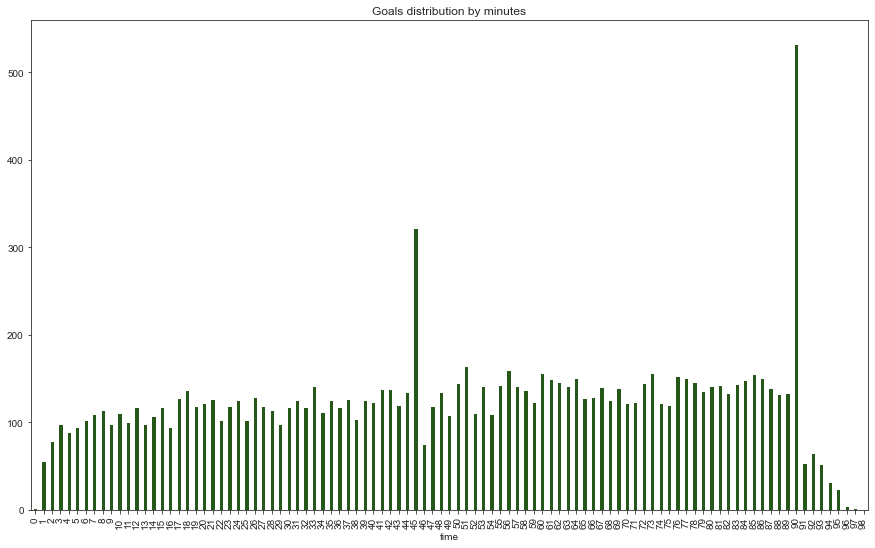

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 9) # (w, h)
## 复制数据
df_distribution_minutes = df_events.copy()

## 按照分钟分组
df_distribution_minutes = df_distribution_minutes[(df_distribution_minutes['is_goal'] == 1) &
                                                ((df_distribution_minutes['time'] >=0 &
                                                (df_distribution_minutes['time'] <=90)))]
## 按照分钟统计
group_goals_by_minutes = df_distribution_minutes.groupby('time').count()

## 画图
group_goals_by_minutes['id_event'].plot(kind='bar',
                                         title='Goals distribution by minutes',
              color='#255818')

可以看到，进球最多的是上下半场要结束的时候。就是45分钟和90分钟。

### 按照分钟统计各事件分布
看清每个事件在哪个时间段发生的概率高

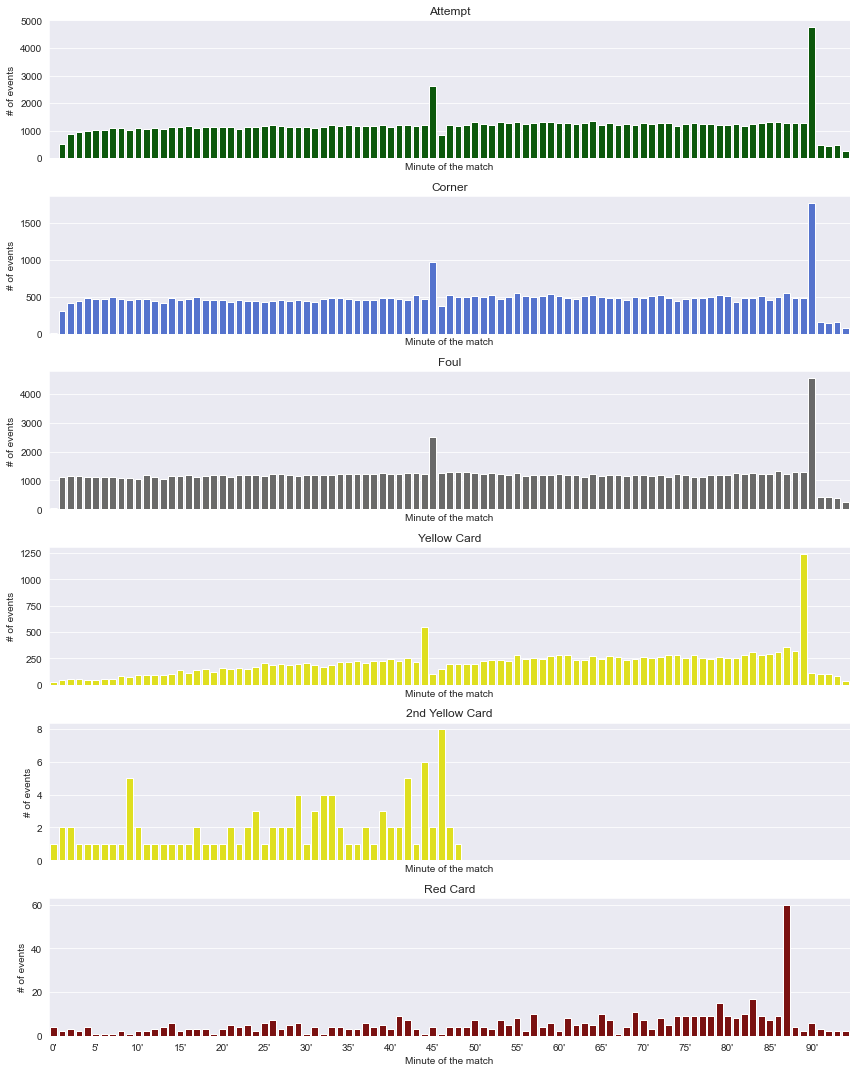

In [43]:
## 复制数据集
df_event_type_distribution_minutes = df_events.copy()

## 按照事件进行数据的分组
def get_event_type_df(event_type):
    """ Function to return grouped data for a specific event type, passed as parameter
        get_event_type_df(event_type) -> dataframe 
    """
    return df_event_type_distribution_minutes[df_event_type_distribution_minutes['event_type'] == event_type].groupby('time').count()

## Setting dark style
sns.set_style('darkgrid')
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 15), sharex=True)

## Custom colors
colors = ['darkgreen', 'royalblue', 'dimgray', 'yellow', 'yellow', 'darkred']
## Event titles
titles = ['Attempt', 'Corner', 'Foul', 'Yellow Card', '2nd Yellow Card', 'Red Card']

## Plotting events
for item in range(0, 6):
    ax = sns.barplot(x = [j for j in range(0, len(get_event_type_df(item+1)['id_event']))],
                 y=get_event_type_df(item+1)['id_event'].values, color=colors[item], ax=axs[item])
    ax.set_xticks([j for j in range(0, len(get_event_type_df(item+1)['id_event']), 5)])
    ax.set_xticklabels(([(str(i) + "'") for i in range(0, len(get_event_type_df(item+1)['id_event']), 5)]))
    ax.set(xlabel = 'Minute of the match', ylabel = '# of events', title = titles[item]);

plt.tight_layout()